## Competitive Interactions Between Neotropical Pollinators and Africanized Honey Bees

David W. Roubik - Science **201**, 1030-1032 (1978)

The aim of this notebook is to recreate the original figure from the paper by David W. Roubik including the fit to the data and discuss the result.

The important claim that Roubik makes is that he finds evidence that neotropical pollinators compete with africanized honey bees over resources. He use the fit ot the the data to supports his ideasbecause a fit ; the parabola predicts that there are no neotropical pollinators if there is a sufficient number of africanized honey bees. 

To analyze what has happened the following questions could be helpful:

1. **Do the data support this claim?**
2. **How did Roubik arrive at his results?**
3. **Did his initial hypothesis influence the way he analyzes the data?**
4. **What is the role of the journal/editor? Science is a very prestiguous journal.**
5. **Did he fabricate the result, or simply misinterpret the outcome of a statiscal method?**

Michiel de Dood - Leiden University - November 2020

## Summary of the result of Roubik

The main text explains the correlation between the number of different species of bees as follows:

Stingless bees became less abundant when Africanized honey bees increased in numbers on Melochia villosa (Table 1
and Fig. 1). Removal of Africanized honey bee hives led to reversal in abundance trends among Africanized and stingless
bees (P < .05 in a nested analysis of variance; nested groups were comprised of days when Africanized honey bee hives
were present or absent). The mean daily number of foraging Africanized honey bees dropped from 111.3 to 72.0 and that
of stingless bees increased from 23.3 to 61.0 after Africanized honey bee removal. Figure 1 illustrates the relationship
between Africanized and stingless bee abundance on Melochia (7). At low densities of each forager class, usually occurring
at the first observations made at recently opened flowers, there was no negative numerical interaction. But at high densities of Africanized honey bees, their numbers increased as stingless bees became less abundant.

<img src = 'OriginalFig1.png' width=600>

(7) Regression analysis was performed with the Honeywell 6660 computer and the Biomedical Sciences (BMDP) polynomial regression package at the University of Kansas. The program compared linear and curvilinear regression lines for goodness of fit. The F ratio for reduction of residual error by the parabola fitted to Melochia data was significant at P < .001, but by a chisquare test, an insignificant amount of the variance in the y-variable was explained (P < .005).

## Getting Roubik's data: Data Thief

http://datathief.org/ DataThief III is a program to extract (reverse engineer) data points from a graph. Typically, you scan a graph from a publication, load it into DataThief, and save the resulting coordinates, so you can use them in calculations or graphs that include your own data. 

**Warning** In general taking a graph from a paper and extracting the data is a bad scientific practice. The prefered action is to contact the author and ask him/her for permission to use the data in your research. If that author doesn't have the original data you can suggest the Data Thief solution. If such data ends up in your report/paper that you (or the university) will publish (make public) it is better if the author of the original paper is aware of this before the information becomes public (google scholar is quick!) and is given a chance to contribute to your research or at least give feedback.

In our case we continue with the procedure. The paper and the scientific errors made are well documented on the internet. Spoiler: My personal opinion is that there are significant scientific flaws in the paper, but that these mistakes were all made with the best intentions.

From this point on, our task is to read in the datafile, plot the data and do the fit and see if we can reproduce the parabola found by David Roubik. If this is succesful, we have proven that this is an honest and reproducible mistake and that we need to think about how to interpret Fig. 1 of the paper. 

The data is in the file 'honeybees.dat'

In [1]:
# Plotting support using matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Enable inline plotting
%matplotlib inline

In [2]:
# Reading data from local disk using numpy loadtxt function
# x, y = np.loadtxt('honeybees.dat', delimiter=',', unpack=True, usecols=(0,1))

# Reading data from a file on the internet using urllib and numpy loadtxt function
from urllib.request import urlopen

file=urlopen('https://home.physics.leidenuniv.nl/~dood/RS-BP/data/honeybees.dat')
x, y = np.loadtxt(file, delimiter=',', unpack=True, usecols=(0,1))

In [3]:
# These settings are explained in the 'Making better scientific figures' notebook

# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*1.5   # Note: These labels are potentially too small                                        
MEDIUM_SIZE = 12*1.5   
BIGGER_SIZE = 14*1.5

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches


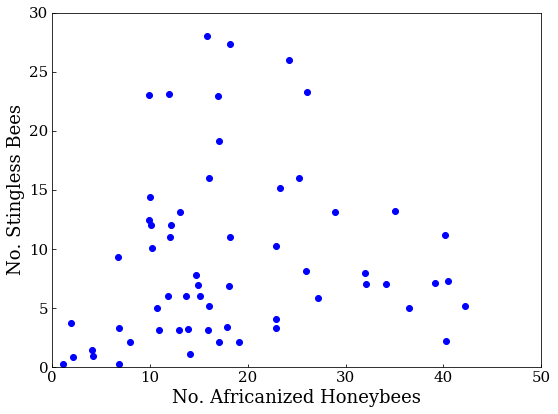

In [4]:
plt.plot(x,y, color='blue', ls='None', marker='o')

plt.xlim(0,50)  # Always put the point (0,0) in your plot if possible!
plt.ylim(0,30)  # Always put the point (0,0) in your plot if possible!

plt.ylabel('No. Stingless Bees')         # An axis always has a label!
plt.xlabel('No. Africanized Honeybees')

plt.tight_layout()
    
plt.savefig('Fig1.png',dpi=600)   # It is a small figure so use many dpi's

plt.show()

## Fitting a parabola to the data

In [5]:
# Define a function that will fit to the data. In our case a parabola with independent variable x and fit parameters a,b,c
def stingless(x, a, b, c):
    "No. of stingless bees as a function of africanized honeybees x"
    return (a + b*x + c*x**2)

In [6]:
# Now get your favorite curve fitting tool. I use the very basic curve_fit from scipy
from scipy.optimize import curve_fit

In [7]:
# The actual fit, fit parameters and error bar
popt, pcov = curve_fit(stingless, x, y)

print ("a = ", popt[0], "+/-", pcov[0,0]**0.5)
print ("b = ", popt[1], "+/-", pcov[1,1]**0.5)
print ("c = ", popt[2], "+/-", pcov[2,2]**0.5)

a =  -0.19688733831783797 +/- 3.1021926430804085
b =  1.0563488998680246 +/- 0.32579297590254247
c =  -0.02240879374049574 +/- 0.007207950867222207


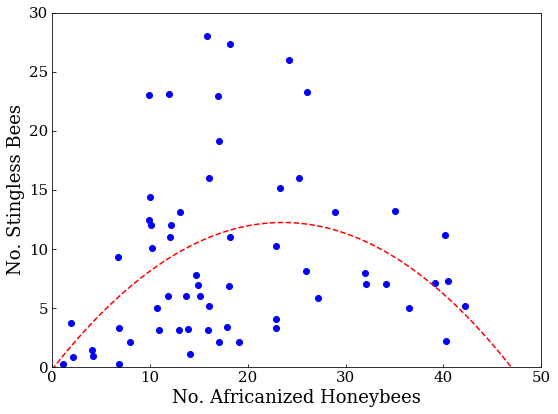

In [8]:
plt.plot(x,y, color='blue', ls='None', marker='o')

# Plot the function on top of the data
x_fit=np.linspace(0.,50.,100)                    # Use a fine grid to get a smooth curve!
fit=stingless(x_fit, popt[0],popt[1],popt[2])

plt.plot(x_fit, fit,  color='red', ls='dashed')

plt.xlim(0,50)  # Always put the point (0,0) in your plot if possible!
plt.ylim(0,30)  # Always put the point (0,0) in your plot if possible!

plt.ylabel('No. Stingless Bees')         # An axis always has a label!
plt.xlabel('No. Africanized Honeybees')

plt.tight_layout()
    
plt.savefig('Fig2.png',dpi=600)   # It is a small figure so use many dpi's

plt.show()

### Adding Confidence Intervals 
One possible way to visualize the quality of your fit is by using so called confidence intervals. Here we plot 1-sigma intervals. Int his case we need to extend the plotrange to get a good visualization of the confidence intervals. Note that the often accepted confidence interval to accept or reject a theory is 5-sigma. 

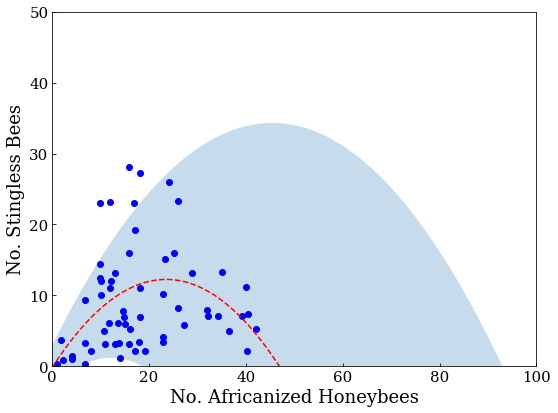

In [9]:
plt.plot(x,y, color='blue', ls='None', marker='o')

# Plot the function on top of the data
x_fit=np.linspace(0.,100.,100)                    # Use a fine grid to get a smooth curve!
fit=stingless(x_fit, popt[0],popt[1],popt[2])

plt.plot(x_fit, fit,  color='red', ls='dashed')

# Add cofidence intervals
nstd = 1.0 # to draw nstd-sigma intervals
fit_up = stingless(x_fit, popt[0]+nstd* pcov[0,0]**0.5,popt[1]+nstd* pcov[1,1]**0.5,popt[2]+nstd*pcov[2,2]**0.5) 
fit_dw = stingless(x_fit, popt[0]-nstd* pcov[0,0]**0.5,popt[1]-nstd* pcov[1,1]**0.5,popt[2]-nstd*pcov[2,2]**0.5) 

plt.fill_between(x_fit, fit_up, fit_dw, alpha=.25)

plt.xlim(0,100)  # Always put the point (0,0) in your plot if possible!
plt.ylim(0,50)  # Always put the point (0,0) in your plot if possible!

plt.ylabel('No. Stingless Bees')         # An axis always has a label!
plt.xlabel('No. Africanized Honeybees')

plt.tight_layout()
    
plt.savefig('Fig2.png',dpi=600)   # It is a small figure so use many dpi's

plt.show()

### What did David W. Roubik observe?

The claim made in the paper is that the number of stingless honeybees decreases when there are more africanized honeybees becuase they compete for the same resources. In a competitive environment the more efficient species survives at the expensive of the other species. 

This can be visualized by plotting the fraction of stingless honeybees as a function of the number of africanized honeybees. To avoid a too hasty conclusion one shouls also plot the fraction of africanized honeybees as a function of the number of stingless bees. See below.

**What do you conclude?**

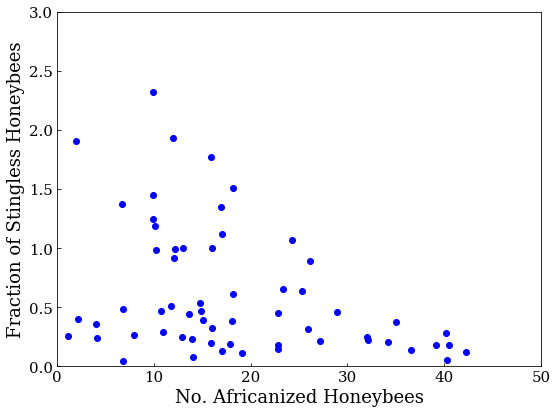

In [10]:
plt.plot(x,y/x, color='blue', ls='None', marker='o')

plt.xlim(0,50)  # Always put the point (0,0) in your plot if possible!
plt.ylim(0,3)  # Always put the point (0,0) in your plot if possible!

plt.ylabel('Fraction of Stingless Honeybees')         # An axis always has a label!
plt.xlabel('No. Africanized Honeybees')

plt.tight_layout()

plt.show()

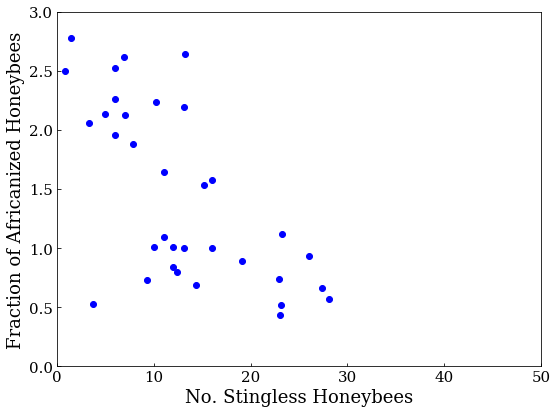

In [11]:
plt.plot(y,x/y, color='blue', ls='None', marker='o')

plt.xlim(0,50)  # Always put the point (0,0) in your plot if possible!
plt.ylim(0,3)  # Always put the point (0,0) in your plot if possible!

plt.ylabel('Fraction of Africanized Honeybees')         # An axis always has a label!
plt.xlabel('No. Stingless Honeybees')

plt.tight_layout()

plt.show()